## 神经网络+词向量
- 时间复杂度：高
- 空间复杂度：中

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from a_Data_preprocessing import load_xy, size
from b_metrics import metric, Timer
%matplotlib inline
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.utils import to_categorical
from numpy import argmax

## 配置

In [2]:
maxlen = 200  # 序列长度
output_dim = size  # 词向量维度
batch_size = 512
epochs = 99
verbose = 2
patience = 1  # 没有进步的训练轮数
callbacks = [EarlyStopping('val_acc', patience=patience)]
validation_split = .05

## 数据读取、预处理

In [3]:
X_train, X_test, y_train, y_test = load_xy(2)
X_train = pad_sequences(X_train, maxlen, dtype='float')
X_test = pad_sequences(X_test, maxlen, dtype='float')
y_train = to_categorical(y_train, 9)
y_test = to_categorical(y_test, 9)

### CNN

In [4]:
from tensorflow.python.keras.layers import Conv1D, MaxPool1D, GlobalMaxPool1D
filters = 50  # 卷积滤波器数量
kernel_size = 10  # 卷积层滤波器大小
model = Sequential(name='CNN')
model.add(Conv1D(filters, kernel_size * 2, padding='same', activation='relu', input_shape=(maxlen, size)))
model.add(MaxPool1D(pool_size=2))  # strides默认等于pool_size
model.add(Conv1D(filters * 2, kernel_size, padding='same', activation='relu'))
model.add(GlobalMaxPool1D())  # 对于时序数据的全局最大池化
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 200, 50)           100050    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 100)          50100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 909       
Total params: 151,059
Trainable params: 151,059
Non-trainable params: 0
_________________________________________________________________


In [5]:
t = Timer()
model.compile('adam', 'categorical_crossentropy', ['acc'])
model.fit(X_train, y_train, batch_size, epochs, verbose, callbacks, validation_split)
del t

Train on 13304 samples, validate on 701 samples
Epoch 1/99
13304/13304 - 27s - loss: 1.1498 - acc: 0.6401 - val_loss: 0.6730 - val_acc: 0.7561
Epoch 2/99
13304/13304 - 26s - loss: 0.5636 - acc: 0.8024 - val_loss: 0.5947 - val_acc: 0.7846
Epoch 3/99
13304/13304 - 26s - loss: 0.4628 - acc: 0.8431 - val_loss: 0.5548 - val_acc: 0.8003
Epoch 4/99
13304/13304 - 27s - loss: 0.3972 - acc: 0.8668 - val_loss: 0.5607 - val_acc: 0.7889
1.81分钟


                precision    recall  f1-score   support

          car_       0.96      0.96      0.96       409
    education_       0.82      0.85      0.83       410
entertainment_       0.79      0.73      0.76       375
      fashion_       0.72      0.86      0.78       394
      finance_       0.74      0.88      0.80       402
     military_       0.77      0.73      0.75       343
     politics_       0.67      0.64      0.66       400
      science_       0.89      0.64      0.74       372
       sports_       0.97      0.97      0.97       393

     micro avg       0.81      0.81      0.81      3498
     macro avg       0.81      0.81      0.81      3498
  weighted avg       0.81      0.81      0.81      3498



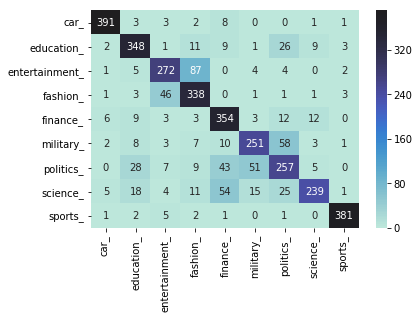

In [6]:
y_pred = model.predict(X_test)
metric(argmax(y_test, axis=1), argmax(y_pred, axis=1))

### GRU

In [7]:
from tensorflow.python.keras.layers import GRU
units = 100  # RNN神经元数量
model = Sequential(name='GRU')
model.add(GRU(units, input_shape=(maxlen, size)))
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               60300     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909       
Total params: 61,209
Trainable params: 61,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
t = Timer()
model.compile('adam', 'categorical_crossentropy', ['acc'])
model.fit(X_train, y_train, batch_size, epochs, verbose, callbacks, validation_split)
del t

Train on 13304 samples, validate on 701 samples
Epoch 1/99
13304/13304 - 77s - loss: 1.6383 - acc: 0.4625 - val_loss: 1.2233 - val_acc: 0.6049
Epoch 2/99
13304/13304 - 85s - loss: 1.0065 - acc: 0.6669 - val_loss: 0.8405 - val_acc: 0.7118
Epoch 3/99
13304/13304 - 90s - loss: 0.7170 - acc: 0.7537 - val_loss: 0.6234 - val_acc: 0.8003
Epoch 4/99
13304/13304 - 93s - loss: 0.5713 - acc: 0.8014 - val_loss: 0.5454 - val_acc: 0.8074
Epoch 5/99
13304/13304 - 95s - loss: 0.4930 - acc: 0.8274 - val_loss: 0.5117 - val_acc: 0.8174
Epoch 6/99
13304/13304 - 95s - loss: 0.4479 - acc: 0.8405 - val_loss: 0.5018 - val_acc: 0.8203
Epoch 7/99
13304/13304 - 96s - loss: 0.4171 - acc: 0.8565 - val_loss: 0.4801 - val_acc: 0.8317
Epoch 8/99
13304/13304 - 97s - loss: 0.3937 - acc: 0.8602 - val_loss: 0.4864 - val_acc: 0.8317
12.18分钟


                precision    recall  f1-score   support

          car_       0.94      0.97      0.95       409
    education_       0.84      0.90      0.87       410
entertainment_       0.78      0.78      0.78       375
      fashion_       0.74      0.81      0.78       394
      finance_       0.86      0.80      0.83       402
     military_       0.75      0.85      0.80       343
     politics_       0.77      0.64      0.70       400
      science_       0.84      0.78      0.81       372
       sports_       0.98      0.98      0.98       393

     micro avg       0.84      0.84      0.84      3498
     macro avg       0.83      0.83      0.83      3498
  weighted avg       0.84      0.84      0.83      3498



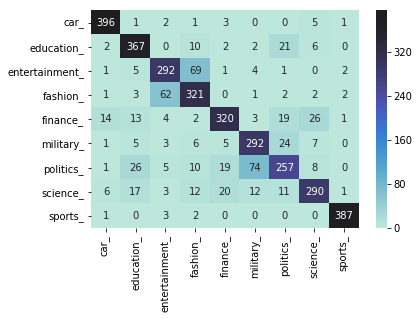

In [9]:
y_pred = model.predict(X_test)
metric(argmax(y_test, axis=1), argmax(y_pred, axis=1))